In [94]:
# Set Imports
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_colwidth', 200)

In [95]:
# Gather data from SPY ETF
!pip install pandas_datareader
import pandas_datareader as pdr

start_date = pd.to_datetime('2000-01-01')
stop_date = pd.to_datetime('2010-12-31')

spy = pdr.data.get_data_yahoo('SPY', start_date, stop_date)

display(spy)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,148.250000,143.875000,148.250000,145.437500,8164300.0,96.555046
2000-01-04,144.062500,139.640625,143.531250,139.750000,8089800.0,92.779175
2000-01-05,141.531250,137.250000,139.937500,140.000000,12177900.0,92.945160
2000-01-06,141.500000,137.750000,139.625000,137.750000,6227200.0,91.451416
2000-01-07,145.750000,140.062500,140.312500,145.750000,8066500.0,96.762573
...,...,...,...,...,...,...
2010-12-27,125.769997,125.040001,125.129997,125.650002,58126000.0,101.302704
2010-12-28,125.949997,125.500000,125.900002,125.830002,55309100.0,101.447830
2010-12-29,126.199997,125.900002,125.980003,125.919998,58033100.0,101.520378


Text(0.5, 1.0, 'SPY')

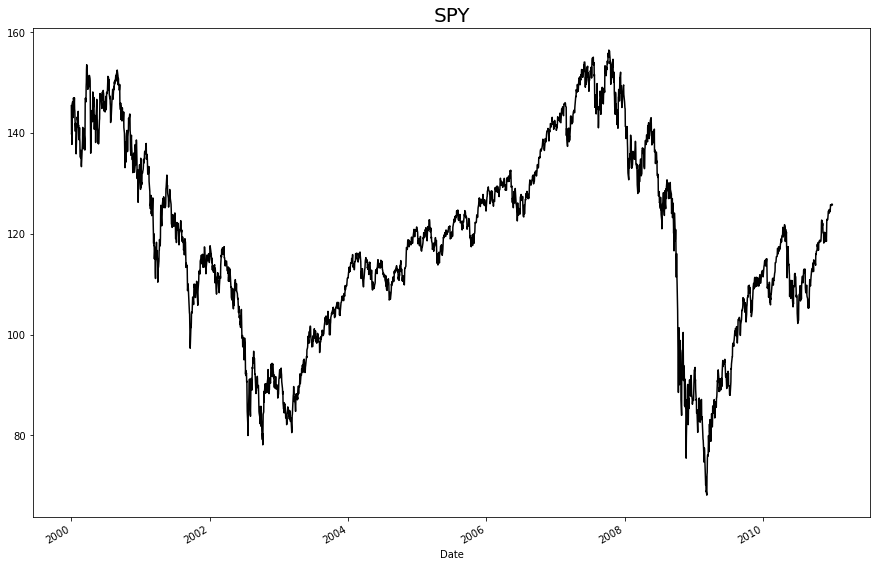

In [3]:
# Plot data
spy_c = spy['Close']

fig, ax = plt.subplots(figsize=(15,10))
spy_c.plot(color='k')
plt.title("SPY", fontsize=20)

In [96]:
import numpy as np

# add the outcome variable, 1 if the trading session was positive (close>open), -1 otherwise
spy['outcome'] = np.where((spy['Close'] - spy['Open'])>0.25,1,-1)
spy['outcome'].fillna(1.0,inplace=True)  # fill missing values

spy['ho'] = spy['High'] - spy['Open'] # distance between Highest and Opening price in one day
spy['lo'] = spy['Low'] - spy['Open'] # distance between Lowest and Opening price in one day
spy['gain'] = spy['Close'] - spy['Open'] # daily return
spy.tail(100) # Last 100 rows in DataFrame

,High,Low,Open,Close,Volume,Adj Close,outcome,ho,lo,gain
Date,,,,,,,,,,
2010-08-11,110.690002,109.120003,110.650002,109.300003,273406900.0,87.193085,-1,0.040001,-1.529999,-1.349998
2010-08-12,109.019997,107.599998,107.650002,108.629997,239542600.0,86.658569,1,1.369995,-0.050003,0.979996
2010-08-13,108.959999,108.180000,108.290001,108.309998,158698500.0,86.403282,-1,0.669998,-0.110001,0.019997
2010-08-16,108.610001,107.180000,107.570000,108.260002,147895300.0,86.363388,1,1.040001,-0.389999,0.690002
2010-08-17,110.389999,108.879997,109.190002,109.589996,172270300.0,87.424393,1,1.199997,-0.310005,0.399994
...,...,...,...,...,...,...,...,...,...,...
2010-12-27,125.769997,125.040001,125.129997,125.650002,58126000.0,101.302704,1,0.639999,-0.089996,0.520004
2010-12-28,125.949997,125.500000,125.900002,125.830002,55309100.0,101.447830,-1,0.049995,-0.400002,-0.070000
2010-12-29,126.199997,125.900002,125.980003,125.919998,58033100.0,101.520378,-1,0.219994,-0.080002,-0.060005


In [97]:

spy_1 = spy.shift(1,axis=0) # 1 day lagg
spy_2 = spy.shift(2,axis=0) # 2 days lagg
spy_3 = spy.shift(3,axis=0) # 3 days lagg


In [100]:
print(spy_2)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2000-01-03         NaN         NaN         NaN         NaN         NaN   
2000-01-04         NaN         NaN         NaN         NaN         NaN   
2000-01-05  148.250000  143.875000  148.250000  145.437500   8164300.0   
2000-01-06  144.062500  139.640625  143.531250  139.750000   8089800.0   
2000-01-07  141.531250  137.250000  139.937500  140.000000  12177900.0   
...                ...         ...         ...         ...         ...   
2010-12-27  125.820000  125.410004  125.480003  125.779999  78878100.0   
2010-12-28  125.779999  125.290001  125.639999  125.599998  70053700.0   
2010-12-29  125.769997  125.040001  125.129997  125.650002  58126000.0   
2010-12-30  125.949997  125.500000  125.900002  125.830002  55309100.0   
2010-12-31  126.199997  125.900002  125.980003  125.919998  58033100.0   

             Adj Close  outcome      

In [72]:
# Make 3 new features
spy['feat1'] = np.where(spy['Close'] > spy_1['Open'],1,-1) # 1 if Close price is grather than Open price one day before, -1 itherwise
spy['feat2'] = np.where(spy['Close'] > spy_2['Open'],1,-1) # 1 if Close price is grather than Open price two days before, -1 itherwise
spy['feat3'] = np.where(spy['Close'] > spy_3['Open'],1,-1) # 1 if Close price is grather than Open price three days before, -1 itherwise

In [73]:
spy['return'] = np.log(spy['Open'].shift(1)/spy['Open']) # return in 24h

# 2 new features
spy['momentum'] = spy['return'].rolling(5).mean().shift(1) # trend of price in 5 days
spy['volatility'] = spy['return'].rolling(20).std().shift(1) # variance of price in 20 days

In [70]:
np.log(90/80)

0.11778303565638346

In [30]:
print(spy['Open'].shift(1))

Date
2000-01-03           NaN
2000-01-04    148.250000
2000-01-05    143.531250
2000-01-06    139.937500
2000-01-07    139.625000
                 ...    
2010-12-27    125.639999
2010-12-28    125.129997
2010-12-29    125.900002
2010-12-30    125.980003
2010-12-31    125.800003
Name: Open, Length: 2767, dtype: float64


In [74]:

spy['short_rolling'] = spy['Close'].rolling(window=5).mean()
spy['long_rolling'] = spy['Close'].rolling(window=10).mean()

In [75]:
# new feature
spy['ma'] = np.where(spy['short_rolling']>spy['long_rolling'],1,-1) # 1 if 'short_rolling' is greather than 'long_rolling', -1 otherwise

In [76]:
# only the columns that are predictors remain
spy_features = spy.drop(['High','Low','Open','Close','Volume','Adj Close','return','gain','short_rolling','long_rolling'],axis=1)

In [77]:
# fill missing values
spy_features['momentum'].fillna(0.001114,inplace=True)
spy_features['volatility'].fillna(0.021565,inplace=True)

In [78]:
from sklearn.model_selection import train_test_split

cols = ['ho','lo','feat1','feat2','feat3','momentum','volatility','ma'] # columns to be used as predictors
X = spy_features[cols] # predictors
y = spy_features['outcome'] # target variable
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=False) # Spliting data into train and test set

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[10,30,40],
    'max_depth':[4,5,6,10],
    'max_features':[2,4,6,8]
}
clf = RandomForestClassifier(random_state=5) # Random Forest Classifier
grid_search = GridSearchCV(clf,param_grid,cv=5,scoring='accuracy',verbose=3)
grid_search.fit(X_train,y_train)  # model training
grid_search.best_params_  # print best parameters

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=4, max_features=2, n_estimators=10;, score=0.856 total time=   0.3s
[CV 2/5] END max_depth=4, max_features=2, n_estimators=10;, score=0.855 total time=   0.1s
[CV 3/5] END max_depth=4, max_features=2, n_estimators=10;, score=0.876 total time=   0.1s
[CV 4/5] END max_depth=4, max_features=2, n_estimators=10;, score=0.842 total time=   0.1s
[CV 5/5] END max_depth=4, max_features=2, n_estimators=10;, score=0.860 total time=   0.2s
[CV 1/5] END max_depth=4, max_features=2, n_estimators=30;, score=0.856 total time=   0.5s
[CV 2/5] END max_depth=4, max_features=2, n_estimators=30;, score=0.853 total time=   0.8s
[CV 3/5] END max_depth=4, max_features=2, n_estimators=30;, score=0.871 total time=   0.6s
[CV 4/5] END max_depth=4, max_features=2, n_estimators=30;, score=0.850 total time=   0.7s
[CV 5/5] END max_depth=4, max_features=2, n_estimators=30;, score=0.863 total time=   0.5s
[CV 1/5] END max_depth=4, ma

[CV 1/5] END max_depth=5, max_features=6, n_estimators=10;, score=0.861 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=6, n_estimators=10;, score=0.871 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=6, n_estimators=10;, score=0.860 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=6, n_estimators=10;, score=0.832 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=6, n_estimators=10;, score=0.863 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=6, n_estimators=30;, score=0.853 total time=   0.6s
[CV 2/5] END max_depth=5, max_features=6, n_estimators=30;, score=0.871 total time=   0.6s
[CV 3/5] END max_depth=5, max_features=6, n_estimators=30;, score=0.876 total time=   0.5s
[CV 4/5] END max_depth=5, max_features=6, n_estimators=30;, score=0.858 total time=   0.5s
[CV 5/5] END max_depth=5, max_features=6, n_estimators=30;, score=0.863 total time=   0.5s
[CV 1/5] END max_depth=5, max_features=6, n_estimators=40;, score=0.851 total time=   0.7s

[CV 2/5] END max_depth=10, max_features=2, n_estimators=10;, score=0.850 total time=   0.2s
[CV 3/5] END max_depth=10, max_features=2, n_estimators=10;, score=0.840 total time=   0.2s
[CV 4/5] END max_depth=10, max_features=2, n_estimators=10;, score=0.822 total time=   0.2s
[CV 5/5] END max_depth=10, max_features=2, n_estimators=10;, score=0.868 total time=   0.3s
[CV 1/5] END max_depth=10, max_features=2, n_estimators=30;, score=0.858 total time=   0.6s
[CV 2/5] END max_depth=10, max_features=2, n_estimators=30;, score=0.866 total time=   0.8s
[CV 3/5] END max_depth=10, max_features=2, n_estimators=30;, score=0.871 total time=   1.5s
[CV 4/5] END max_depth=10, max_features=2, n_estimators=30;, score=0.842 total time=   1.8s
[CV 5/5] END max_depth=10, max_features=2, n_estimators=30;, score=0.871 total time=   2.8s
[CV 1/5] END max_depth=10, max_features=2, n_estimators=40;, score=0.861 total time=   2.9s
[CV 2/5] END max_depth=10, max_features=2, n_estimators=40;, score=0.863 total t

{'max_depth': 5, 'max_features': 4, 'n_estimators': 30}

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [80]:
# Training model with best parameters
clf_opt = RandomForestClassifier(max_depth=5, max_features=4, n_estimators=30, random_state=5)
model = clf_opt.fit(X_train,y_train) 

In [81]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0) # Accuracy of the model

Correct Prediction (%):  84.71720818291215


In [82]:
# Classification report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

          -1       0.89      0.84      0.87       488
           1       0.79      0.85      0.82       343

    accuracy                           0.85       831
   macro avg       0.84      0.85      0.84       831
weighted avg       0.85      0.85      0.85       831



In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

Confusion Matrix
[[1054  109]
 [ 102  671]]

Accuracy
0.8910123966942148


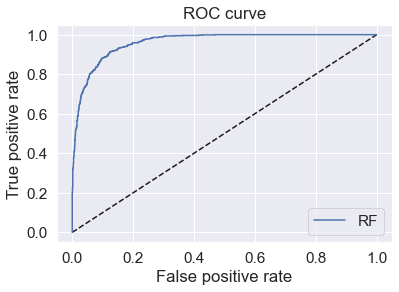

In [84]:
# Performance Metrics
y_pred_rf = clf_opt.predict_proba(X_train)[:, 1]
y_pred = clf_opt.predict(X_train)
fpr_rf, tpr_rf, _ = roc_curve(y_train, y_pred_rf)

print("Confusion Matrix")
print(confusion_matrix(y_train, y_pred))

print('')
print("Accuracy")
print(accuracy_score(y_train, y_pred))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [22]:
print(y_pred_rf)

[0.01292783 0.03813526 0.30354918 ... 0.87853244 0.80400463 0.91564222]


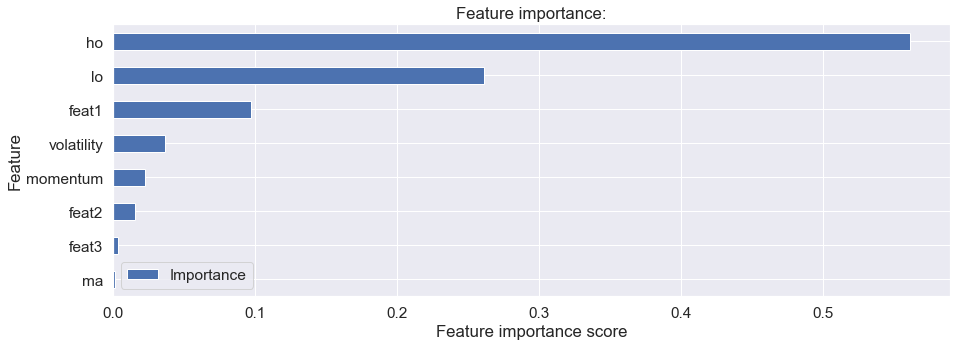

In [85]:
# By-product of RF-best features
title = 'Feature importance:'
figsize = (15,5)
feat_imp = pd.DataFrame({'Importance':clf_opt.feature_importances_})
feat_imp['Feature']=X.columns
feat_imp.sort_values(by='Importance',ascending=False,inplace=True)
feat_imp=feat_imp
feat_imp.sort_values(by='Importance',inplace=True)
feat_imp=feat_imp.set_index('Feature',drop=True)
feat_imp.plot.barh(title=title,figsize=figsize)
plt.xlabel('Feature importance score')
plt.show()

              precision    recall  f1-score   support

          -1       0.89      0.84      0.87       488
           1       0.79      0.85      0.82       343

    accuracy                           0.85       831
   macro avg       0.84      0.85      0.84       831
weighted avg       0.85      0.85      0.85       831

Confusion Matrix
[[411  77]
 [ 50 293]]

Accuracy
0.8471720818291215


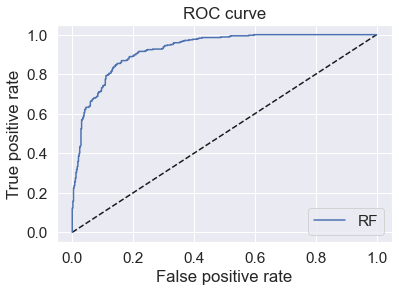

In [86]:
# Performance Metrics
y_pred_rf = clf_opt.predict_proba(X_test)[:, 1]
y_pred = clf_opt.predict(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print('')
print("Accuracy")
print(accuracy_score(y_test, y_pred))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [87]:
clf_opt = RandomForestClassifier(max_depth=5, max_features=4, n_estimators=30, random_state=5)
model = clf_opt.fit(X,y)
spy['prediction'] = model.predict(X)  # New column for strategy evaluation

In [91]:
# Strategy evaluation
spy['Predicted_Signal'] = model.predict(X)  # Signal to buy or sell
spy['Original_returns'] = spy['return']
Cumulative_original_returns = np.cumsum(spy[:len(X)]['Original_returns']).apply(np.exp) # Cumulativ return without strategy
spy['Strategy_Returns'] = spy['Original_returns']* spy['Predicted_Signal'] - spy['Original_returns']* spy['Predicted_Signal']*0.025
Cumulative_Strategy_returns = np.cumsum(spy[:len(X)]['Strategy_Returns']).apply(np.exp) # Cumulative return with strategy

In [63]:
print(np.cumsum(spy[:len(X)]['Original_returns']))

Date
2000-01-03         NaN
2000-01-04    0.032347
2000-01-05    0.057704
2000-01-06    0.059940
2000-01-07    0.055028
                ...   
2010-12-27    0.169547
2010-12-28    0.163412
2010-12-29    0.162777
2010-12-30    0.164207
2010-12-31    0.166355
Name: Original_returns, Length: 2767, dtype: float64


In [62]:
print(spy['Original_returns'])

Date
2000-01-03         NaN
2000-01-04    0.032347
2000-01-05    0.025357
2000-01-06    0.002236
2000-01-07   -0.004912
                ...   
2010-12-27    0.004067
2010-12-28   -0.006135
2010-12-29   -0.000635
2010-12-30    0.001430
2010-12-31    0.002149
Name: Original_returns, Length: 2767, dtype: float64


In [61]:
print(Cumulative_original_returns)

Date
2000-01-03         NaN
2000-01-04    1.032876
2000-01-05    1.059402
2000-01-06    1.061773
2000-01-07    1.056570
                ...   
2010-12-27    1.184768
2010-12-28    1.177522
2010-12-29    1.176774
2010-12-30    1.178458
2010-12-31    1.180993
Name: Original_returns, Length: 2767, dtype: float64


[None, None, None, None]

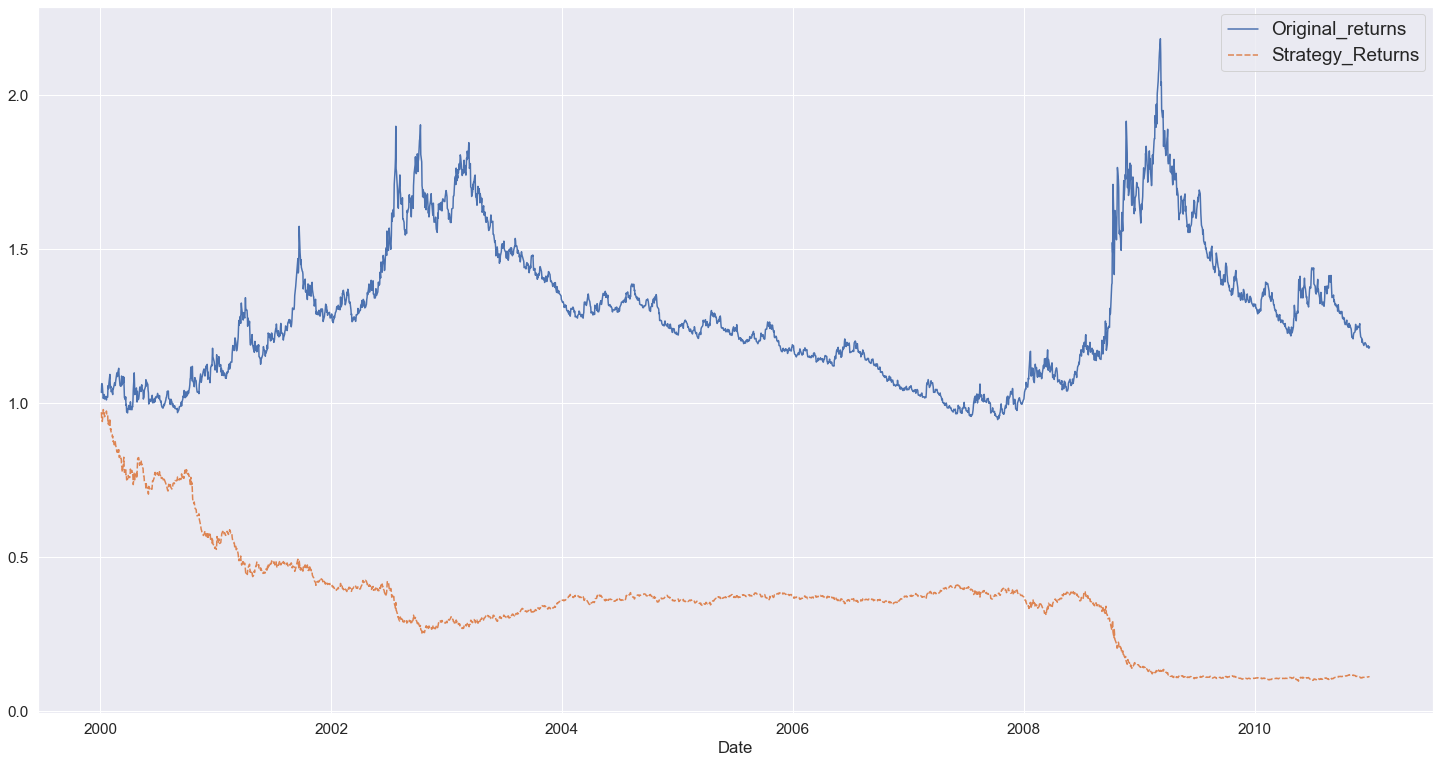

In [92]:
import seaborn as sns
newdf = pd.concat([Cumulative_original_returns, Cumulative_Strategy_returns], axis=1) # new DataFrame with 2 column 

plt.figure(figsize=(25, 13))
sns.set(font_scale=1.4) 
ax = sns.lineplot(data=newdf)
plt.setp(ax.get_legend().get_texts(), fontsize='19')

In [175]:
# Trading simulation
money = 50000-50000*0.025
stock = int(50000/148.25000)
for i in spy.index:
    if spy.loc[i]['Predicted_Signal']==1:
        st = (0.01*money)/(spy.loc[i]['Open'])
        money = money - 0.01*money - 0.01*money*0.025
        stock = stock+st
    else:
        mn = 0.01*stock*(spy.loc[i]['Open'])
        stock = stock - 0.01*stock
        money = money + mn - mn*0.025
print(money)
print(stock)

45002.15802884837
232.69250832423444
